# ReLU vs Swish Activation Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model

In [2]:
%matplotlib inline

network_values = np.arange(-2, 2, 0.05)

def relu(x): 
    return max(0.0, x)

relu_values = []
for value in network_values:
    relu_values.append(relu(value))

def swish(beta):
    function = network_values/(1 + np.exp(-beta*network_values))
    plt.figure(figsize=(10, 7))
    plt.title("ReLU and Swish functions", fontsize = 17)
    plt.plot(network_values, relu_values, label='ReLU', linewidth = 3)
    plt.plot(network_values, function, label= 'Swish', linewidth = 3)
    plt.grid()
    plt.show()
    
interact(swish, beta = widgets.FloatSlider(value=3,min=1, max=5.0, step=0.5))

interactive(children=(FloatSlider(value=3.0, description='beta', max=5.0, min=1.0, step=0.5), Output()), _dom_…

<function __main__.swish(beta)>

In [3]:
dReLU = (network_values > 0) * 1

def dswish(beta):
    dSwish = network_values / (1. + np.exp(-beta*network_values)) + (1. / (1. + np.exp(-beta*network_values))) * (1. - beta*network_values * (1. / (1. + np.exp(-beta*network_values))))
    plt.figure(figsize=(10, 7))
    plt.title("ReLU and Swish function 1st derivatives", fontsize = 16)
    plt.plot(network_values, dReLU, label='dReLU', linewidth = 3)
    plt.plot(network_values, dSwish, label='dSwish', linewidth = 3)
    plt.grid()
    plt.show()
    
interact(dswish, beta = widgets.FloatSlider(value=1,min=1, max=5.0, step=0.5))

interactive(children=(FloatSlider(value=1.0, description='beta', max=5.0, min=1.0, step=0.5), Output()), _dom_…

<function __main__.dswish(beta)>

# Network Topology

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4

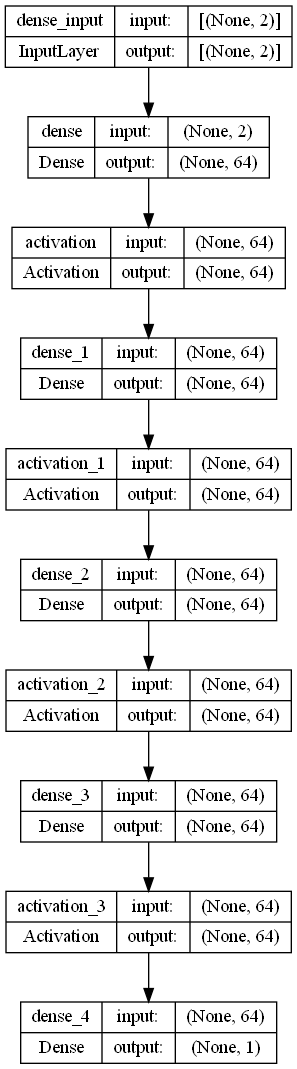

In [4]:
hidden_units = 64

model = Sequential()

model.add(Dense(hidden_units, input_dim=2))
model.add(Activation('swish'))
model.add(Dense(hidden_units))
model.add(Activation('swish'))
model.add(Dense(hidden_units))
model.add(Activation('swish'))
model.add(Dense(hidden_units))
model.add(Activation('swish'))

model.add(Dense(1))
model.summary()

plot_model(model, show_shapes=True, show_layer_names=True)